In [96]:
import pandas as pd
#%matplotlib notebook
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
# Dependencies
import json
import requests


In [97]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [98]:
topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [99]:
clean_movies_df=topmovies_df[['Poster_Link' , 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre','IMDB_Rating' ,'Overview' , 'Meta_score' , 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes' , 'Gross']].dropna()

clean_movies_df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [100]:
Gross= clean_movies_df["Gross"]/1000000
clean_movies_df["Gross"] = Gross

In [101]:
No_of_Votes= clean_movies_df["No_of_Votes"]/100000
clean_movies_df["No_of_Votes"] = No_of_Votes

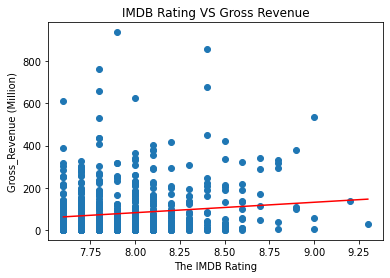

In [104]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
IMDB_Rating = clean_movies_df['IMDB_Rating']
Gross_Revenue = clean_movies_df['Gross']
x_values = IMDB_Rating
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("IMDB Rating VS Gross Revenue")
plt.xlabel('The IMDB Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

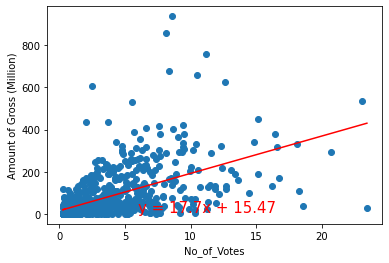

In [106]:
No_of_Votes = clean_movies_df['No_of_Votes']
Gross_Revenue = clean_movies_df['Gross']
x_values = No_of_Votes
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('No_of_Votes')
plt.ylabel('Amount of Gross (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

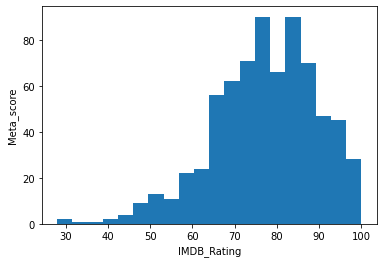

In [85]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(clean_movies_df.loc[:,'Meta_score'],20)
plt.xlabel('IMDB_Rating')
plt.ylabel('Meta_score')
plt.show()


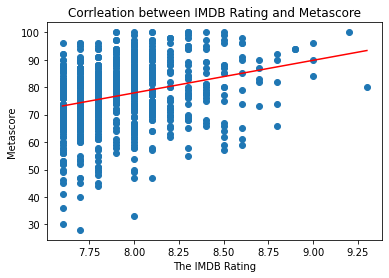

In [108]:
#Correlation between IMDB Rating and Meta score
IMDB_Rating = clean_movies_df['IMDB_Rating']
Meta_score = clean_movies_df['Meta_score']
x_values = IMDB_Rating
y_values = Meta_score
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Corrleation between IMDB Rating and Metascore")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The IMDB Rating')
plt.ylabel('Metascore')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

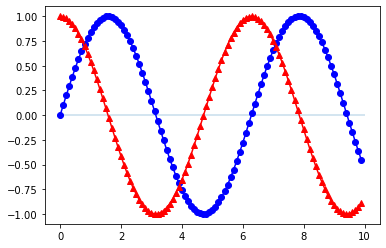

In [88]:
x_axis = np.arange(0, 10, 0.1)
sin = np.sin(x_axis)
cos = np.cos(x_axis)
plt.hlines(0, 0, 10, alpha=0.25)
sine_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="Cosine")


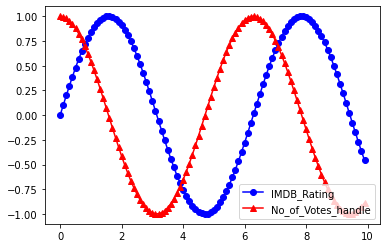

In [89]:
IMDB_Rating_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="IMDB_Rating")
# Each point on the cosine chart is marked by a red triangle
No_of_Votes_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="No_of_Votes_handle")
plt.legend(loc="lower right")

The r-squared is: 0.3883062578187025


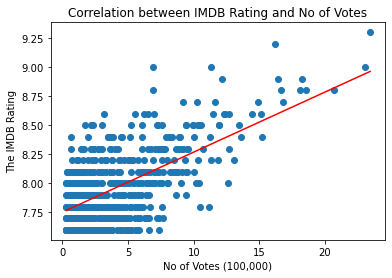

In [109]:
#Correlation between IMDB Rating and No of Votes
No_of_Votes = clean_movies_df['No_of_Votes']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and No of Votes')
plt.xlabel('No of Votes (100,000)')
plt.ylabel('The IMDB Rating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [91]:
Released_Year = clean_movies_df['Released_Year']
The_Meta_Score = clean_movies_df['Meta_score']
Released_Year = ('Released_Year')
x_axis = ,('Meta_score')
plt.bar(x_axis, Released_Year, color='r', alpha=0.5, align="center")

SyntaxError: invalid syntax (Temp/ipykernel_21376/2332752634.py, line 4)

The r-squared is: 0.3883062578187025


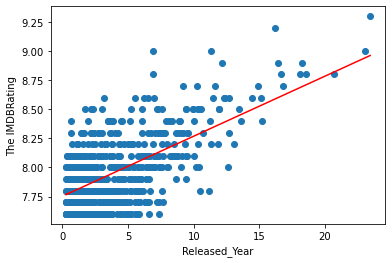

In [92]:
# IMDB Rating Vs Released year 
Released_Year = clean_movies_df['Released_Year']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Released_Year')
plt.ylabel('The IMDBRating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [93]:
# Filter the DataFrame down only to those columns to chart
Movie_Income = clean_movies_df[["IMDB_Rating", "Meta_score"]]

# Set the index to be "State" so they will be used as labels
Movie_Income = Movie_Income.set_index("Meta_score")

Movie_Income.head()

,IMDB_Rating
Meta_score,
80.0,9.3
100.0,9.2
84.0,9.0
90.0,9.0
96.0,9.0


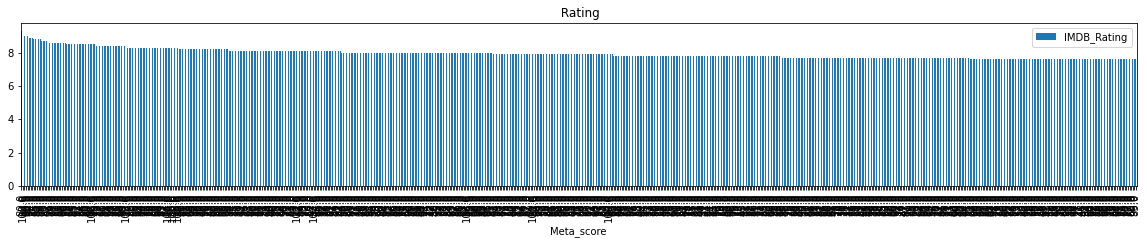

<Figure size 432x288 with 0 Axes>

In [94]:
# Use DataFrame.plot() in order to create a bar chart Rating VS Meta Score
Movie_Income.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title(" Rating")

plt.show()
plt.tight_layout()

In [95]:
#3D chart

import plotly.express as px
df = px.data.Movie_Income()
fig = px.line_3d(df, x="Meta_score", y="IMDB_Rating", z="Released_Year")
fig.show()

AttributeError: module 'plotly.express.data' has no attribute 'Movie_Income'

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
